'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


386
292
244
212


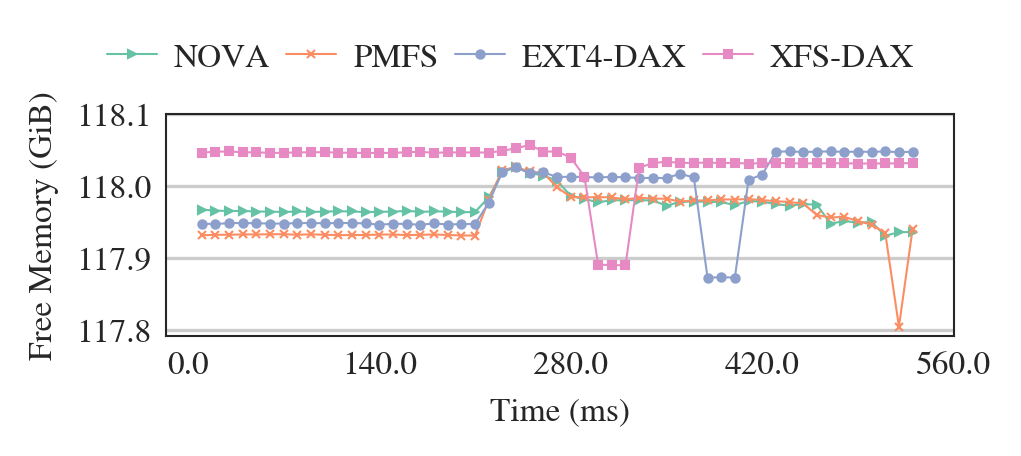

In [49]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import sys

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


mem_tables = []
fss = ["NOVA", "PMFS", "EXT4-DAX", "XFS-DAX"]
# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
min_len = sys.maxsize
for fs in fss:
    with open("./mem-table-twitter-" + fs, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
        mem_tables.append((df['Memory(KiB)']/1024/1024).tolist())
        if len(df) < min_len:
            min_len = len(df)

for mem_table in mem_tables:
    print(len(mem_table))
    del mem_table[min_len : ]

for mem_table in mem_tables:
    new_mem_table = []
    for i in range(len(mem_table)):
        if i % 4 == 0:
            new_mem_table.append(mem_table[i])
    mem_tables[mem_tables.index(mem_table)] = new_mem_table

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3.5)))

line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+"]
num_jobs = list(range(1, len(mem_tables[0]) + 1))

for idx, fs in enumerate(fss):
    plt.plot(num_jobs, mem_tables[idx], color=plt.get_cmap('Set2')(idx), markerfacecolor=plt.get_cmap('Set2')(idx), linewidth=line_width, label=fs, marker=marks[idx], markeredgecolor=plt.get_cmap('Set2')(idx), markersize=2, markeredgewidth=0.5)
    # plt.scatter(num_jobs, mem_tables[idx], color=plt.get_cmap('Set2')(idx), s=1)

plt.xticks(np.linspace(0, 56, 5), np.linspace(0, 560, 5), fontsize=8)
plt.yticks(np.linspace(117.8, 118.1, 4), fontsize=8)
plt.xlabel("Time (ms)", fontsize=8) 
plt.ylabel('Free Memory (GiB)', fontsize=8)
            
fig.legend(fss, loc='center', bbox_to_anchor=(0.5, 1), ncol=4, fontsize=8, columnspacing=0.5, handletextpad=0.5, handlelength=1.5)
ax = fig.gca()
lw = 0.5
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(lw)
plt.tight_layout()
plt.savefig("./FIG-Mem.pdf", bbox_inches='tight', pad_inches=0)
